In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/yang-jin-an/Downloads/finaldf.csv")

In [29]:
import numpy as np
from matplotlib import rc
%matplotlib inline


rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [27]:
plt.rcParams['font.family'] = 'Arial'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56471 entries, 0 to 56470
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                56471 non-null  int64  
 1   value                     56471 non-null  float64
 2   발생                        56471 non-null  int64  
 3   검거                        56471 non-null  int64  
 4   cggCd                     56471 non-null  int64  
 5   stdgCd                    56471 non-null  int64  
 6   mno                       56471 non-null  int64  
 7   sno                       56471 non-null  int64  
 8   flr                       56471 non-null  float64
 9   ctrtDay                   56471 non-null  int64  
 10  rentArea                  56471 non-null  float64
 11  grfe                      56471 non-null  int64  
 12  rtfe                      56471 non-null  int64  
 13  bldgUsg                   56471 non-null  object 
 14  newUpd

In [6]:
df.head()

,Unnamed: 0,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,...,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
0,0,3.50,4879,3411,11620,10300,1061,18,14.0,370,...,0,0,1,0,0,12,0,10,1,0.226657
1,1,3.25,4879,3411,11620,10200,1435,7,2.0,553,...,0,0,1,0,0,24,1,28,2,0.262968
2,2,3.50,4879,3411,11620,10200,1462,12,4.0,506,...,0,0,1,0,0,24,1,27,0,0.517072
3,3,3.50,4879,3411,11620,10100,1564,1,3.0,509,...,0,0,1,0,0,24,3,20,1,0.375666
4,4,3.50,4879,3411,11620,10200,1419,9,3.0,468,...,0,0,1,0,0,12,1,32,2,0.292742


In [7]:
df.drop(columns =['Unnamed: 0'], inplace=True)

## 1.전세가격에 영향을 주는 변수(요인) 파악

In [8]:
df.columns

Index(['value', '발생', '검거', 'cggCd', 'stdgCd', 'mno', 'sno', 'flr', 'ctrtDay',
       'rentArea', 'grfe', 'rtfe', 'bldgUsg', 'newUpdtYn', 'ctrtUpdtUseYn',
       'bfrGrfe', 'lat', 'lon', '자치구명_강남구', '자치구명_강서구', '자치구명_관악구', '자치구명_동작구',
       '자치구명_송파구', 'ctrtDayMonth', '500m_내_초중등수', '500m_내_bus수', '500m_내_마트수',
       'Closest_Station_Distance'],
      dtype='object')

In [9]:
# 필요없는 변수 제거
heat_df=df.drop(columns=['자치구명_강남구', '자치구명_강서구','자치구명_관악구', '자치구명_동작구', '자치구명_송파구'])

In [10]:
heat_df.head()

,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,...,newUpdtYn,ctrtUpdtUseYn,bfrGrfe,lat,lon,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
0,3.50,4879,3411,11620,10300,1061,18,14.0,370,28.05,...,1.0,0,0.0,37.474501,126.981391,12,0,10,1,0.226657
1,3.25,4879,3411,11620,10200,1435,7,2.0,553,19.50,...,1.0,0,0.0,37.485613,126.927327,24,1,28,2,0.262968
2,3.50,4879,3411,11620,10200,1462,12,4.0,506,21.84,...,0.0,0,13000.0,37.486241,126.924459,24,1,27,0,0.517072
3,3.50,4879,3411,11620,10100,1564,1,3.0,509,17.40,...,0.0,0,7000.0,37.479772,126.944626,24,3,20,1,0.375666
4,3.50,4879,3411,11620,10200,1419,9,3.0,468,27.32,...,0.0,0,11000.0,37.486612,126.931057,12,1,32,2,0.292742


In [11]:
# 건물용도 갯수 파악
heat_df["bldgUsg"].value_counts()

아파트      34098
연립다세대    14981
오피스텔      7392
Name: bldgUsg, dtype: int64

In [12]:
heat_replace = {"bldgUsg" : {"아파트":1, "연립다세대":2, "오피스텔":3}}
heat_df.replace(heat_replace, inplace=True)

In [13]:
heat_df

,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,...,newUpdtYn,ctrtUpdtUseYn,bfrGrfe,lat,lon,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
0,3.50,4879,3411,11620,10300,1061,18,14.0,370,28.05,...,1.0,0,0.0,37.474501,126.981391,12,0,10,1,0.226657
1,3.25,4879,3411,11620,10200,1435,7,2.0,553,19.50,...,1.0,0,0.0,37.485613,126.927327,24,1,28,2,0.262968
2,3.50,4879,3411,11620,10200,1462,12,4.0,506,21.84,...,0.0,0,13000.0,37.486241,126.924459,24,1,27,0,0.517072
3,3.50,4879,3411,11620,10100,1564,1,3.0,509,17.40,...,0.0,0,7000.0,37.479772,126.944626,24,3,20,1,0.375666
4,3.50,4879,3411,11620,10200,1419,9,3.0,468,27.32,...,0.0,0,11000.0,37.486612,126.931057,12,1,32,2,0.292742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56466,3.50,4663,3591,11500,10300,424,23,4.0,218,31.68,...,1.0,0,0.0,37.531385,126.841776,24,0,16,1,0.435804
56467,3.50,4663,3591,11500,10300,105,357,5.0,218,24.30,...,1.0,0,0.0,37.542017,126.842321,24,3,26,2,0.173639
56468,3.50,4663,3591,11500,10300,1091,0,11.0,218,84.94,...,0.0,0,65000.0,37.544622,126.831443,24,6,4,0,0.630359
56469,3.50,4663,3591,11500,10300,410,296,4.0,218,46.77,...,1.0,0,0.0,37.537599,126.849658,24,1,35,0,0.698528


<AxesSubplot: >

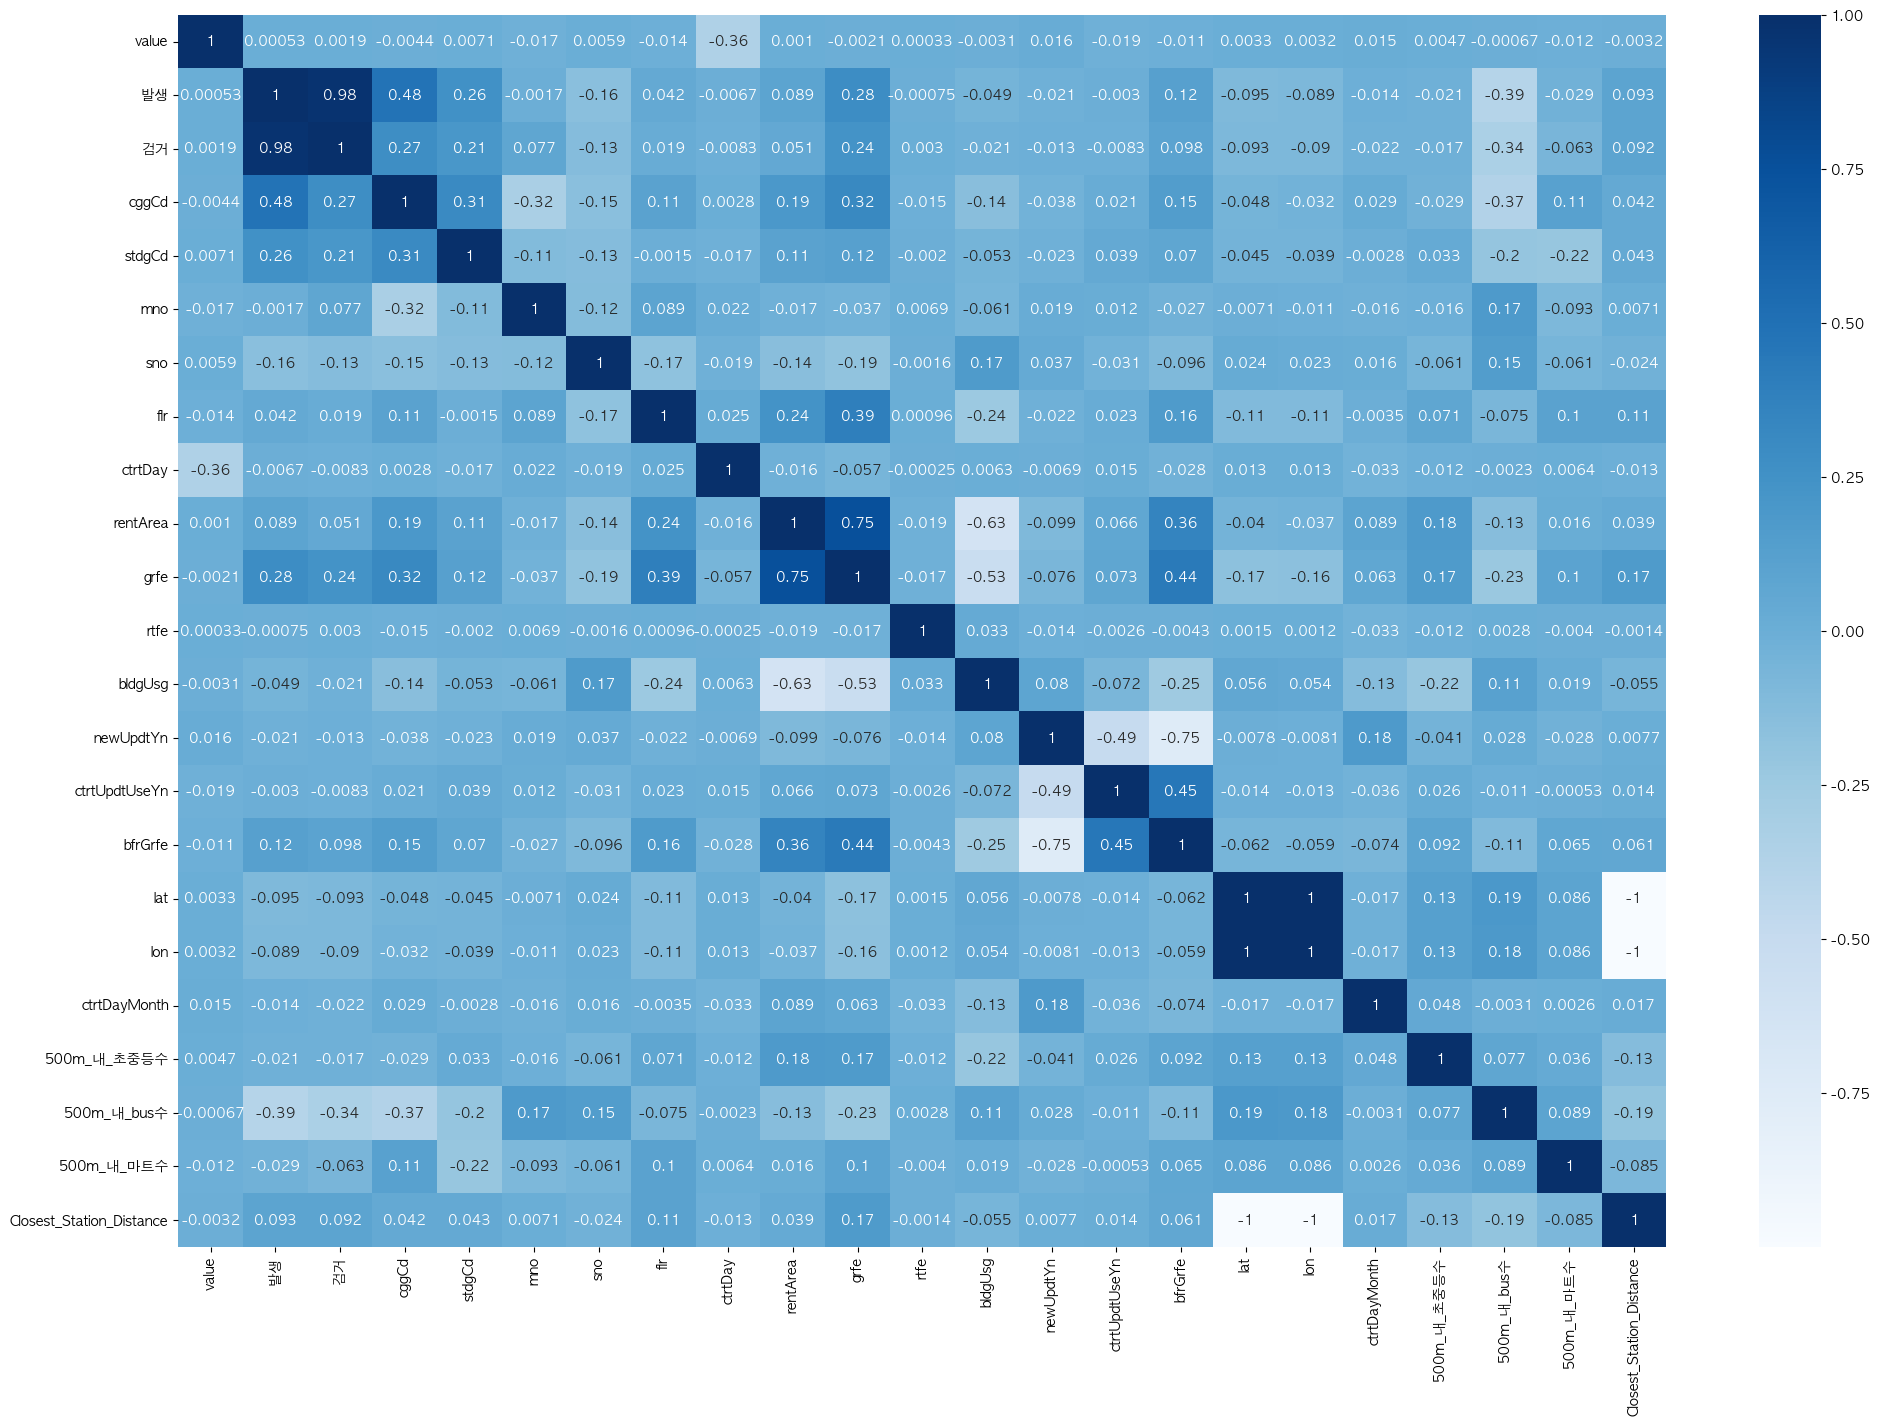

In [78]:
plt.figure(figsize=(24,16))
sns.heatmap(heat_df.corr(), annot=True, cmap="Blues")

## 상관계수를 통해 어떤 변수가 bfrGrfe(전세가)에 영향을 주는지 파악
### -상관계수가 1 , -1에 가까울 수록 영향을 준다
### -1에 가깝다 = x가 올라가면 y도 같이 올라간다
### - rentarea(임대면적) bldgusg(사용용도) bfrgrfe(종전보증금) flr (층) cggCd (자치구코드) 등이 전세가격에 크게 영향을 주는 것을 파악

In [15]:
# 상관계수를 통해 어ㄷ bfrGrfe(전세가)
heat_df2 = heat_df.corr()["grfe"].reset_index().sort_values("grfe", ascending=False)
abs(heat_df.corr())["grfe"].reset_index().sort_values("grfe", ascending=False)

,index,grfe
10,grfe,1.000000
9,rentArea,0.752207
12,bldgUsg,0.527376
15,bfrGrfe,0.436224
7,flr,0.394266
3,cggCd,0.320018
1,발생,0.284610
2,검거,0.235062
20,500m_내_bus수,0.228434
6,sno,0.186857


<AxesSubplot: xlabel='grfe', ylabel='rentArea'>

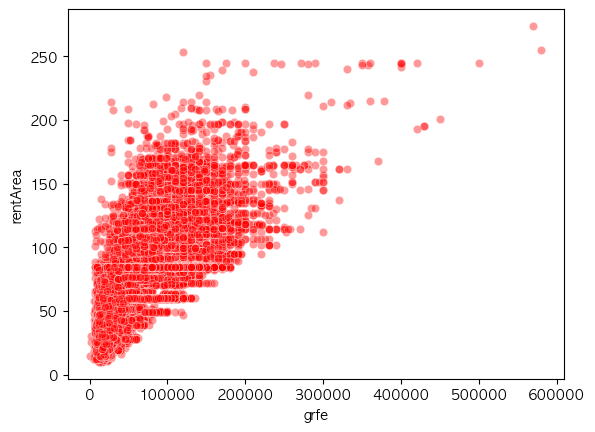

In [45]:
sns.scatterplot(data=df, x="grfe", y="rentArea",
               color="r", alpha=0.4
               )

#### 임대면적과 전세가 상관관계

<AxesSubplot: xlabel='grfe', ylabel='rentArea'>

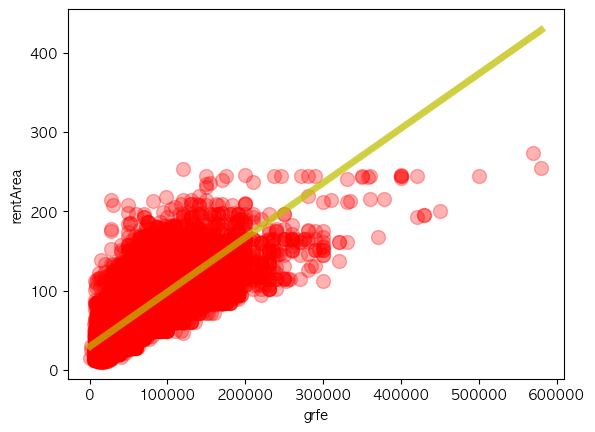

In [57]:
# 임대면적과 전세가 상관관계
sns.regplot(data=df, x="grfe", y="rentArea",
            scatter_kws={"color" :"red", "alpha":0.3, "s" : 100},
            line_kws={"color":"y", "alpha":0.7, "lw":5}\
           )

#### 층수와 전세가 상관관계

<AxesSubplot: xlabel='grfe', ylabel='flr'>

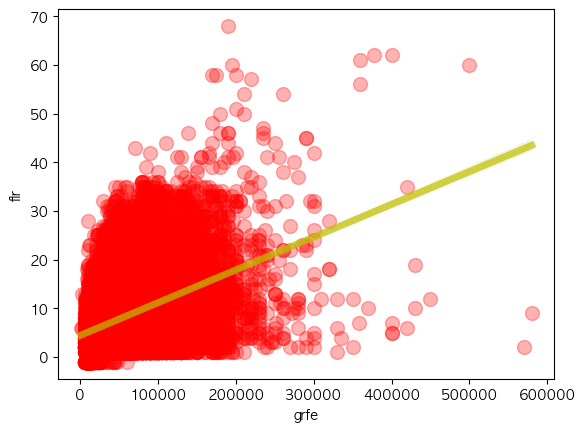

In [58]:
# 층수와 전세가 상관관계
sns.regplot(data=df, x="grfe", y="flr",
            scatter_kws={"color" :"red", "alpha":0.3, "s" : 100},
            line_kws={"color":"y", "alpha":0.7, "lw":5
                     })

## 2.자치구에 별 전세가 분석
### - 구에 따라 전세 가격이 차이가 나는것을 확인
### - 전세가 순위 -> 11680(강남구) 11710(송파구) 11590(동작구) 11620(관악구) 11500(강서구) 

In [17]:
# 구 기준으로 groupby 후 정렬
cggCd_df = df.groupby("cggCd").mean().reset_index().sort_values(by="grfe")

<AxesSubplot: xlabel='cggCd', ylabel='grfe'>

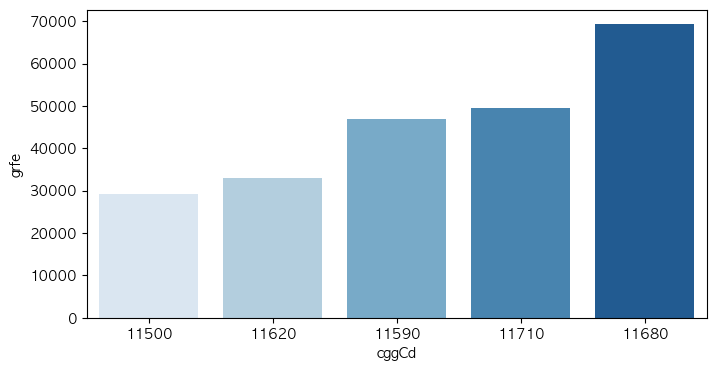

In [31]:
plt.figure(figsize=(8,4))
sns.barplot(data=cggCd_df, x="cggCd", y="grfe", palette="Blues", order=cggCd_df["cggCd"])

<AxesSubplot: xlabel='stdgCd', ylabel='grfe'>

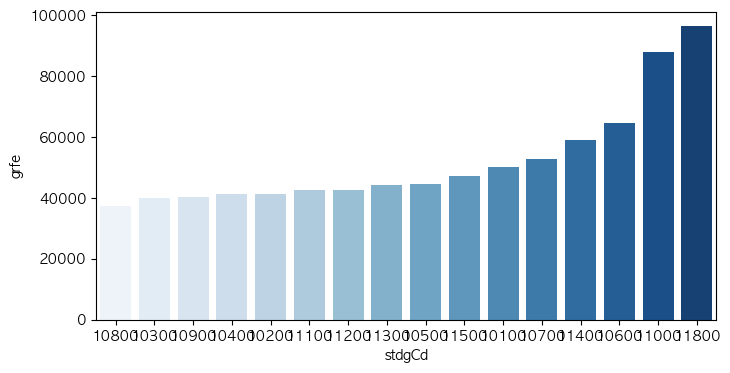

In [206]:
# 동 기준으로 groupby 후 정렬
stdgCd_df = df.groupby("stdgCd").mean().reset_index().sort_values(by="grfe")
plt.figure(figsize=(8,4))
sns.barplot(data=stdgCd_df, x="stdgCd", y="grfe", palette="Blues", order=cggCd_df["stdgCd"])

## 용도별 전세가 분석
### - 주거공간 차이에 따라 유의미한 전세가격 차이가 있다고 판단
### - 전세가격 순위 -> 아파트, 연립다세대, 오피스텔 

In [21]:
# 용도 기준으로 groupby 후 정렬
bldgUsg_df = df.groupby("bldgUsg").mean().reset_index().sort_values(by="grfe")

In [22]:
bldgUsg_df

,bldgUsg,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,...,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
2,오피스텔,3.486201,5177.542208,3737.143398,11600.921266,10557.210498,612.410850,8.947105,8.206710,398.855519,...,0.173431,0.459416,0.054248,0.020969,0.291937,22.134876,1.675460,18.040449,1.324540,21.785240
1,연립다세대,3.488853,4969.191576,3503.129364,11621.918430,10505.540351,403.466057,41.219478,3.218543,386.671784,...,0.153127,0.281957,0.106602,0.122355,0.335959,23.458781,2.227154,18.836593,1.123356,5.857428
0,아파트,3.487631,5232.040648,3688.844712,11635.828788,10586.386298,590.844038,3.486715,9.423163,392.560619,...,0.294416,0.197959,0.079711,0.138278,0.289636,23.584462,2.716640,16.364860,1.193912,155.557493


<AxesSubplot: xlabel='bldgUsg', ylabel='grfe'>

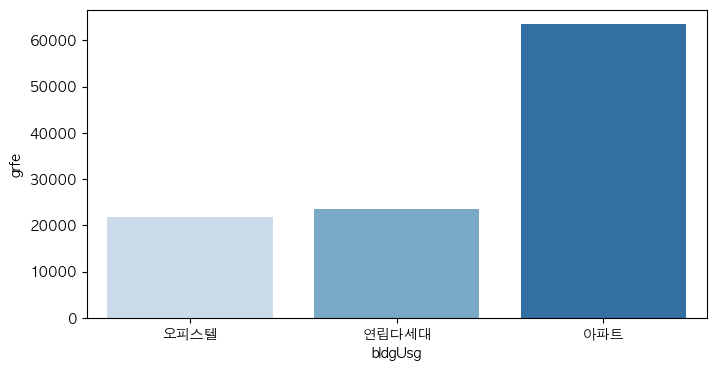

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(data=bldgUsg_df, x="bldgUsg", y="grfe", palette="Blues", order=bldgUsg_df["bldgUsg"])

## 층수 전세가 상세분석
### -층수를 높이에 따라 low mid high very high 네가지 범주로 나눠 분석진행
### -높은 층이 상대적으로 전세 가격이 높은걸 확인


In [64]:
# 용도별 층수 분석
df.groupby("bldgUsg")["flr"].agg({"mean", "min", "max", "std", "var"})

,mean,std,min,var,max
bldgUsg,,,,,
아파트,9.423163,6.415923,1.0,41.164067,68.0
연립다세대,3.218543,1.769314,-1.0,3.130473,19.0
오피스텔,8.206710,4.108134,1.0,16.876762,26.0


<AxesSubplot: xlabel='bldgUsg', ylabel='flr'>

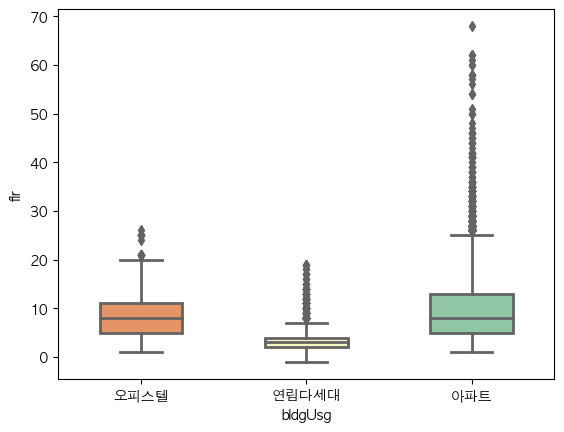

In [102]:
sns.boxplot(x="bldgUsg", y="flr", data=df, palette="Spectral", linewidth=2, width=0.5)

In [71]:
df[df["bldgUsg"] == "아파트"]["flr"].describe()

count    34098.000000
mean         9.423163
std          6.415923
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         68.000000
Name: flr, dtype: float64

In [72]:
df[df["bldgUsg"] == "연립다세대"]["flr"].describe()

count    14981.000000
mean         3.218543
std          1.769314
min         -1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         19.000000
Name: flr, dtype: float64

In [73]:
df[df["bldgUsg"] == "오피스텔"]["flr"].describe()

count    7392.000000
mean        8.206710
std         4.108134
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        26.000000
Name: flr, dtype: float64

In [93]:
def flr_converter(x) :
    if x >= 1 and x <= 5 :
        return "low"
    elif x >=6 and x <= 13 :
        return "mid"
    elif x >= 14 and x <= 30 :
        return "high"
    else :
        return "very high"

In [94]:
flr_converter(2.0)

'low'

In [95]:
df["flr_cat"] = df["flr"].apply( lambda x : flr_converter(x))

In [96]:
df[["flr", "flr_cat"]]

,flr,flr_cat
0,14.0,high
1,2.0,low
2,4.0,low
3,3.0,low
4,3.0,low
...,...,...
56466,4.0,low
56467,5.0,low
56468,11.0,mid
56469,4.0,low


In [103]:
apart_df = df[df["bldgUsg"] == "아파트"]

In [104]:
# 구 기준으로 groupby 후 정렬
apart_df_group = apart_df.groupby("flr_cat")["grfe"].mean().reset_index().sort_values(by="grfe")

In [108]:
apart_df["flr_cat"].value_counts()

mid          15648
low          10896
high          7284
very high      270
Name: flr_cat, dtype: int64

In [105]:
apart_df_group

,flr_cat,grfe
1,low,58242.126468
2,mid,60520.618865
0,high,74831.601181
3,very high,138306.085185


<AxesSubplot: xlabel='flr_cat', ylabel='grfe'>

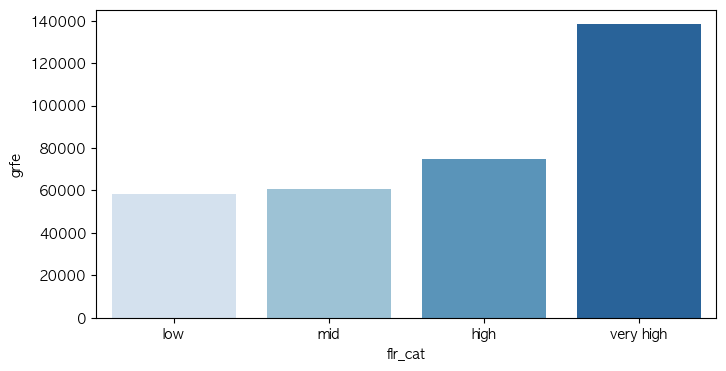

In [110]:
plt.figure(figsize=(8,4))
sns.barplot(data=apart_df_group, x="flr_cat", y="grfe", palette="Blues", order=apart_df_group["flr_cat"])

## 인프라
### 구 동 별 주변 500미터 내 학교 버스 마트 개수 분석

In [133]:
infra_df = df.groupby("cggCd")[["500m_내_초중등수", "500m_내_bus수", "500m_내_마트수"]].mean().reset_index()

In [135]:
infra_df

,cggCd,500m_내_초중등수,500m_내_bus수,500m_내_마트수
0,11500,2.660195,20.090327,1.087683
1,11590,2.121886,23.355363,0.899746
2,11620,2.379135,21.832273,1.300891
3,11680,2.185898,13.473742,0.867573
4,11710,2.633796,14.173551,1.624304


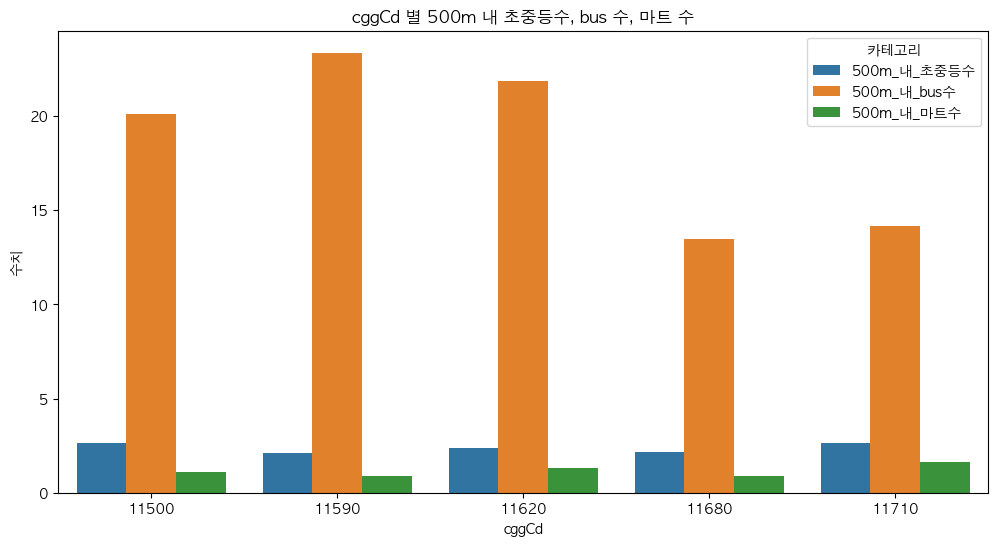

In [146]:
df_melted = infra_df.melt(id_vars='cggCd', var_name='Category', value_name='Value')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='cggCd', y='Value', hue='Category')
plt.title('cggCd 별 500m 내 초중등수, bus 수, 마트 수')
plt.xlabel('cggCd')
plt.ylabel('수치')
plt.legend(title='카테고리')
plt.show()

In [148]:
infra_df = df.groupby("stdgCd")[["500m_내_초중등수", "500m_내_bus수", "500m_내_마트수"]].mean().reset_index()

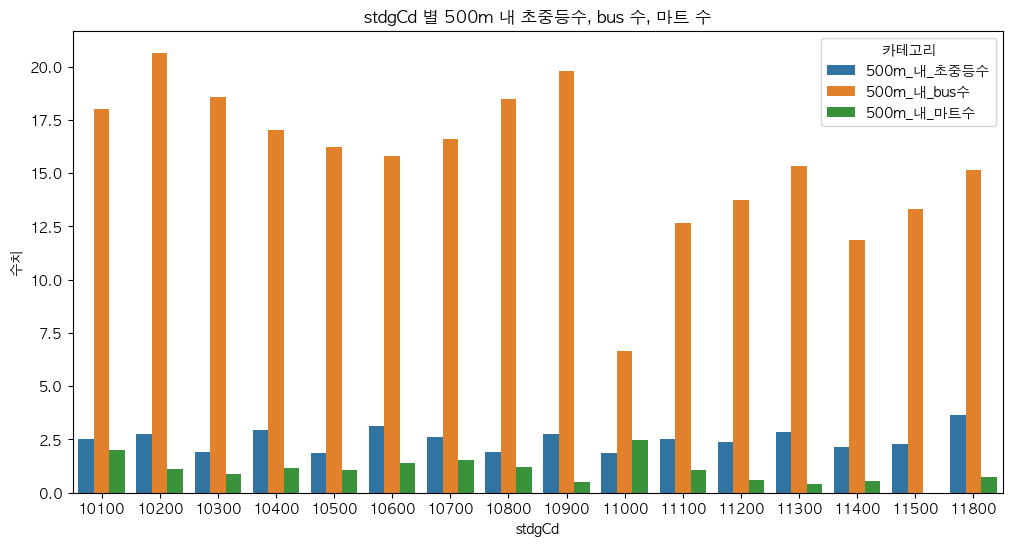

In [150]:
df_melted = infra_df.melt(id_vars='stdgCd', var_name='Category', value_name='Value')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='stdgCd', y='Value', hue='Category')
plt.title('stdgCd 별 500m 내 초중등수, bus 수, 마트 수')
plt.xlabel('stdgCd')
plt.ylabel('수치')
plt.legend(title='카테고리')
plt.show()

## 치안
### - 구, 동 별 범죄발생 검거 분석
### - 범죄 발생 검거 순위 -> 11680(강남구) 11710(송파구)  11620(관악구) 11500(강서구) 11590(동작구)

In [175]:
safety_df = df.groupby("cggCd").mean()["발생"].reset_index().sort_values(by="발생")

<AxesSubplot: xlabel='cggCd', ylabel='발생'>

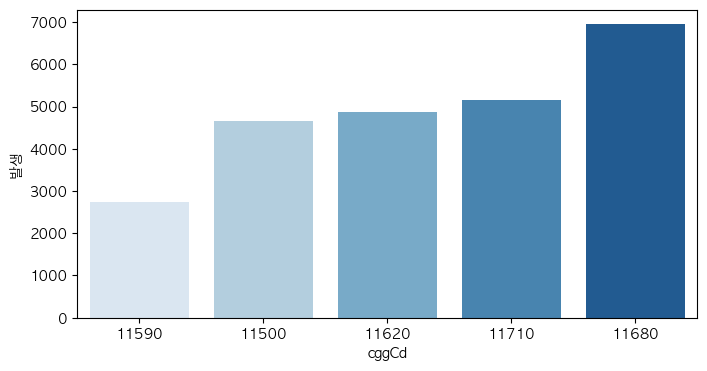

In [176]:
plt.figure(figsize=(8,4))
sns.barplot(data=safety_df, x="cggCd", y="발생", palette="Blues", order=safety_df["cggCd"])

In [178]:
safety_df = df.groupby("stdgCd").mean()["발생"].reset_index().sort_values(by="발생")

<AxesSubplot: xlabel='stdgCd', ylabel='발생'>

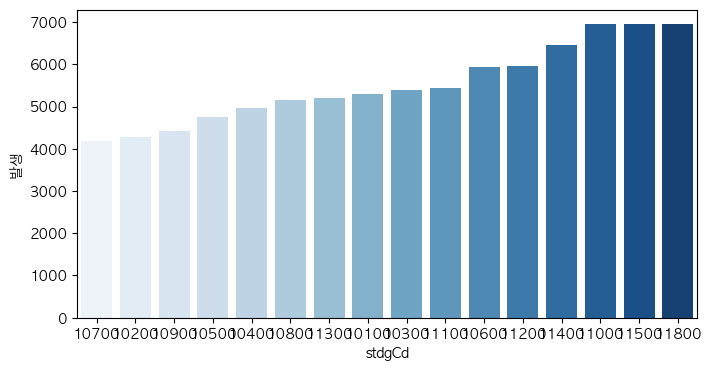

In [180]:
plt.figure(figsize=(8,4))
sns.barplot(data=safety_df, x="stdgCd", y="발생", palette="Blues", order=safety_df["stdgCd"])

<AxesSubplot: xlabel='cggCd', ylabel='검거'>

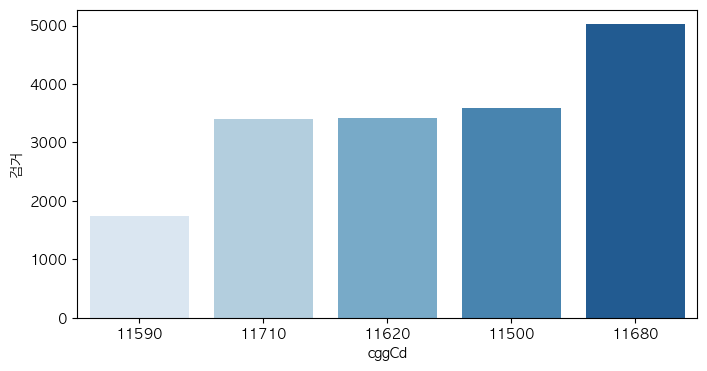

In [181]:
safety_df = df.groupby("cggCd").mean()["검거"].reset_index().sort_values(by="검거")
plt.figure(figsize=(8,4))
sns.barplot(data=safety_df, x="cggCd", y="검거", palette="Blues", order=safety_df["cggCd"])

<AxesSubplot: xlabel='stdgCd', ylabel='검거'>

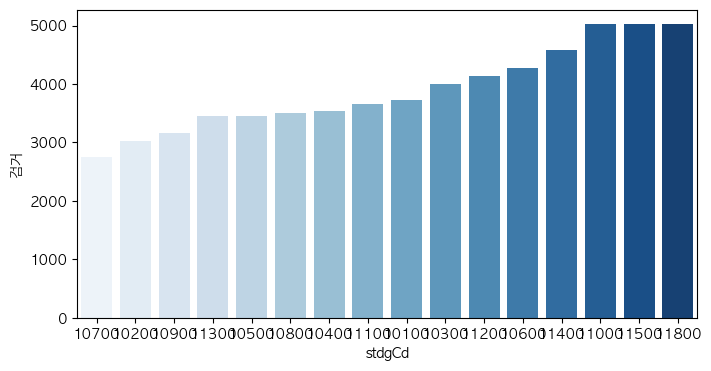

In [182]:
safety_df = df.groupby("stdgCd").mean()["검거"].reset_index().sort_values(by="검거")
plt.figure(figsize=(8,4))
sns.barplot(data=safety_df, x="stdgCd", y="검거", palette="Blues", order=safety_df["stdgCd"])

In [184]:
df["발생"].value_counts()

5167    17067
4663    14370
6947    13615
2735     6703
4879     4716
Name: 발생, dtype: int64

In [187]:
df["Closest_Station_Distance"].describe()

count    56471.000000
mean        98.333411
std       1129.714491
min          0.023490
25%          0.315831
50%          0.478047
75%          0.677750
max      13148.975271
Name: Closest_Station_Distance, dtype: float64

## 지하철 거리와 따른 가격 분석
### - 이상치를 제거하고 시각해 본 결과 큰 상관관계는 알기 힘들었음

In [200]:
pro_df = df[df["Closest_Station_Distance"] < 1]

In [201]:
pro_df["grfe"].describe()

count     51793.000000
mean      47424.669473
std       34614.477885
min        1000.000000
25%       22600.000000
50%       38000.000000
75%       62000.000000
max      580000.000000
Name: grfe, dtype: float64

In [202]:
pro_df = pro_df[pro_df["grfe"] < 62000.000000]

In [203]:
pro_df["Closest_Station_Distance"].describe()

count    38765.000000
mean         0.474992
std          0.215304
min          0.023490
25%          0.305777
50%          0.453877
75%          0.636688
max          0.999938
Name: Closest_Station_Distance, dtype: float64

<AxesSubplot: xlabel='grfe', ylabel='Closest_Station_Distance'>

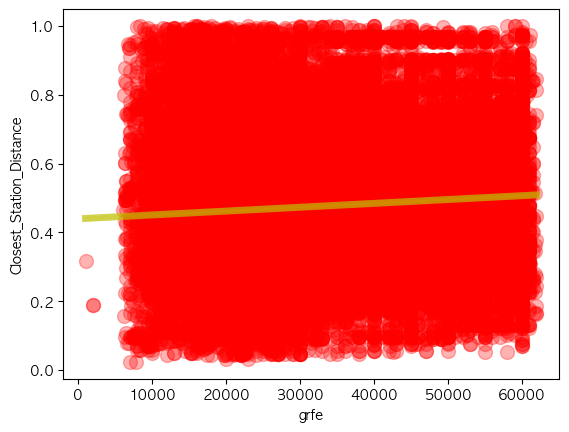

In [204]:
sns.regplot(data=pro_df, x="grfe", y="Closest_Station_Distance",
            scatter_kws={"color" :"red", "alpha":0.3, "s" : 100},
            line_kws={"color":"y", "alpha":0.7, "lw":5
                     })